## Lab 1.4
#### Jason Chou

* Goal: Exercise - Absolute and differential photemetry from simulated (or real?) catalogs

In [19]:
from __future__ import division
import matplotlib.pyplot as plt
import fitmodel, pyfits,ldac
import numpy as np
import random
%matplotlib inline

plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['legend.fontsize'] = 20

In [2]:
#We will be using this function later in Part I
def Bilinear(x,kappa,c,zp):
    ''' Bilinear is the mathematical function that handles the zero-point,
    airmass, and color terms between raw and true magnitudes.
    @parameter x - A numpy array with two columns. The first column is the
    array of colors, and the second is the array of airmasses
    @paramter kappa- The extinction coefficient that we will fit for
    @parameter c  - The color term that we will fit for
    @parameter zp - The zero-point, a fit model parameter
    '''
    return x[:,0]*c + x[:,1]*kappa + zp

In [3]:
#Opening the catalog
cat=ldac.openObjectFile('/afs/ir/class/physics100/materials/lab1.4/lab1.4_reference.cat', table='OBJECTS')
#Let's have a look at what's in the catalog
print len(cat)
print cat.keys()

1000
['ID#', 'mag_g_raw', 'mag_r_raw', 'mag_true_V', 'mag_true_R', 'Altitude']


In [4]:
# Getting all of the columns of the catalog 
## observed values
gmag=cat['mag_g_raw']
rmag=cat['mag_r_raw']

## true values
vmagtrue=cat['mag_true_V']
rmagtrue=cat['mag_true_R']

idnum=cat['ID#']
alt=cat['Altitude']

Just take a look

In [41]:
for i in range(len(cat)):
    print cat[i]

(1, -31.905666, -30.858995, 6.2613702, 7.3080416, 85.122253)
(2, -27.790581, -26.714531, 6.601903, 7.6779523, 64.90654)
(3, -33.616463, -31.639383, 6.6791577, 8.6562376, 40.276588)
(4, -41.481815, -39.664753, 11.826553, 13.643614, 30.695387)
(5, -22.650497, -21.921375, 12.047383, 12.776505, 66.772293)
(6, -33.824535, -33.740795, 5.8661828, 5.9499211, 40.426064)
(7, -31.41337, -30.412781, 8.7676983, 9.7682867, 53.985462)
(8, -27.029444, -25.651537, 6.892365, 8.2702723, 69.025444)
(9, -22.483421, -20.606943, 12.259796, 14.136274, 67.071793)
(10, -19.611961, -18.600418, 8.959878, 9.9714212, 82.523064)
(11, -22.354988, -21.910027, 12.68816, 13.133122, 58.214672)
(12, -27.77709, -25.970634, 5.8546257, 7.6610818, 61.069561)
(13, -36.853756, -36.654053, 10.295922, 10.495624, 35.100548)
(14, -39.674099, -37.945259, 13.598129, 15.326969, 28.538973)
(15, -39.027813, -38.842007, 6.8337655, 7.0195727, 41.938087)
(16, -18.724529, -17.253923, 13.740254, 15.21086, 89.250229)
(17, -28.235704, -28.0090

### Part I
_reference for real-Earth approximation formula: [here](http://www.minorplanet.info/ObsGuides/Misc/photometryguide.htm#What%20is%20Air%20Mass?)_

In [29]:
sec = lambda x: np.cos(np.deg2rad(x))**-1
am = lambda x: sec(90-alt)
## real Earth approximation
am_realE = lambda x:   sec(90-alt) \
                     - 0.0018167*(sec(90-alt)-1) \
                     - 0.02875*(sec(90-alt)-1)**2 \
                     - 0.0008083*(sec(90-alt)-1)**3

airmass = am(alt)
airmass_r = am_realE(alt)
colors = vmagtrue - rmagtrue

#### sanity check: does everything make sense...

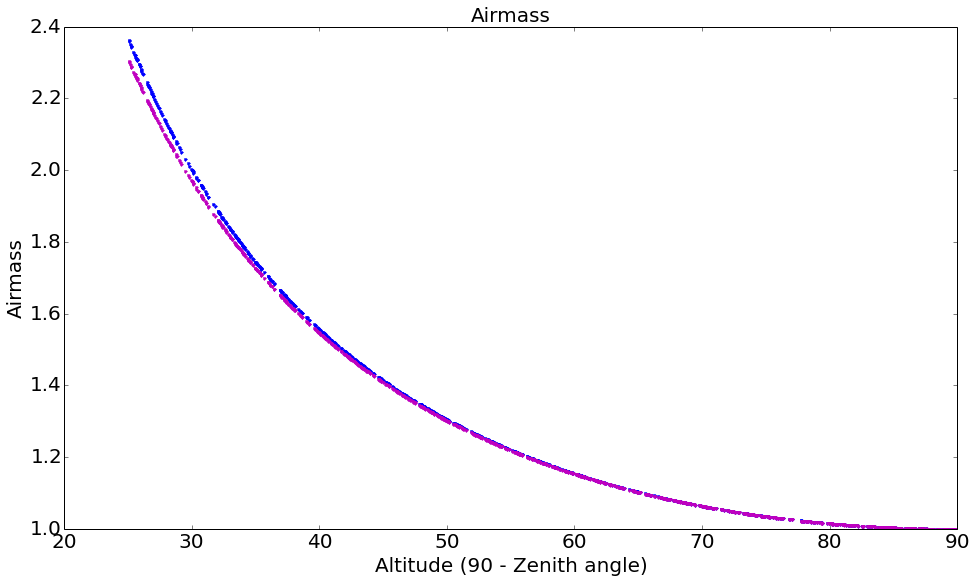

In [31]:
plt.figure(figsize=(16,9))
plt.title('Airmass')
plt.plot(alt,airmass,'b.',label='Flat Earth')
plt.plot(alt,airmass_r,'m.',label='Real Earth')
plt.xlabel('Altitude (90 - Zenith angle)'); plt.ylabel('Airmass')

Though I was a little worried about the accuracy of the `sec` approximation at low altitude, it seems not to be an issue...

In [36]:
xcols = np.column_stack((colors,airmass))
dif_g = vmagtrue-gmag
dif_r = rmagtrue-rmag

######## r 
fit_r=fitmodel.FitModel(xcols,dif_r,np.ones_like(vmagtrue),Bilinear)
fit_r.fit()

kappa_r = fit_r.par_vals['kappa']
colorterm_r = fit_r.par_vals['c']
zeropoint_r = fit_r.par_vals['zp']

######## g
fit_g=fitmodel.FitModel(xcols,dif_g,np.ones_like(vmagtrue),Bilinear)
fit_g.fit()

kappa_g = fit_g.par_vals['kappa']
colorterm_g = fit_g.par_vals['c']
zeropoint_g = fit_g.par_vals['zp']

print ''
print '          Red'
print '----------------------------'
print ' Best-fit extinction: {0:.2f}'.format(kappa_r)
print '          color term: {0:.2f}'.format(colorterm_r)
print '          zero point: {0:.2f}'.format(zeropoint_r)
print ''
print '          Green'
print '----------------------------'
print ' Best-fit extinction: {0:.2f}'.format(kappa_g)
print '          color term: {0:.2f}'.format(colorterm_g)
print '          zero point: {0:.2f}'.format(zeropoint_g)

fval = 15660.6, nfcn 56
fval = 15660.6, nfcn 30
Fit parameters : 
{'zp': 11.91122893147603, 'c': -0.11732863632773238, 'kappa': 19.750428176718437}
fval = 15660.6, nfcn 56
fval = 15660.6, nfcn 30
Fit parameters : 
{'zp': 11.911228985202841, 'c': -0.11732856677599435, 'kappa': 19.75042817434073}

          Red
----------------------------
 Best-fit extinction: 19.75
          color term: -0.12
          zero point: 11.91

          Green
----------------------------
 Best-fit extinction: 19.75
          color term: -0.12
          zero point: 11.91


In [37]:
calmag_g = gmag + Bilinear(xcols,kappa_g,colorterm_g,zeropoint_g)
calmag_r = rmag + Bilinear(xcols,kappa_r,colorterm_r,zeropoint_r)

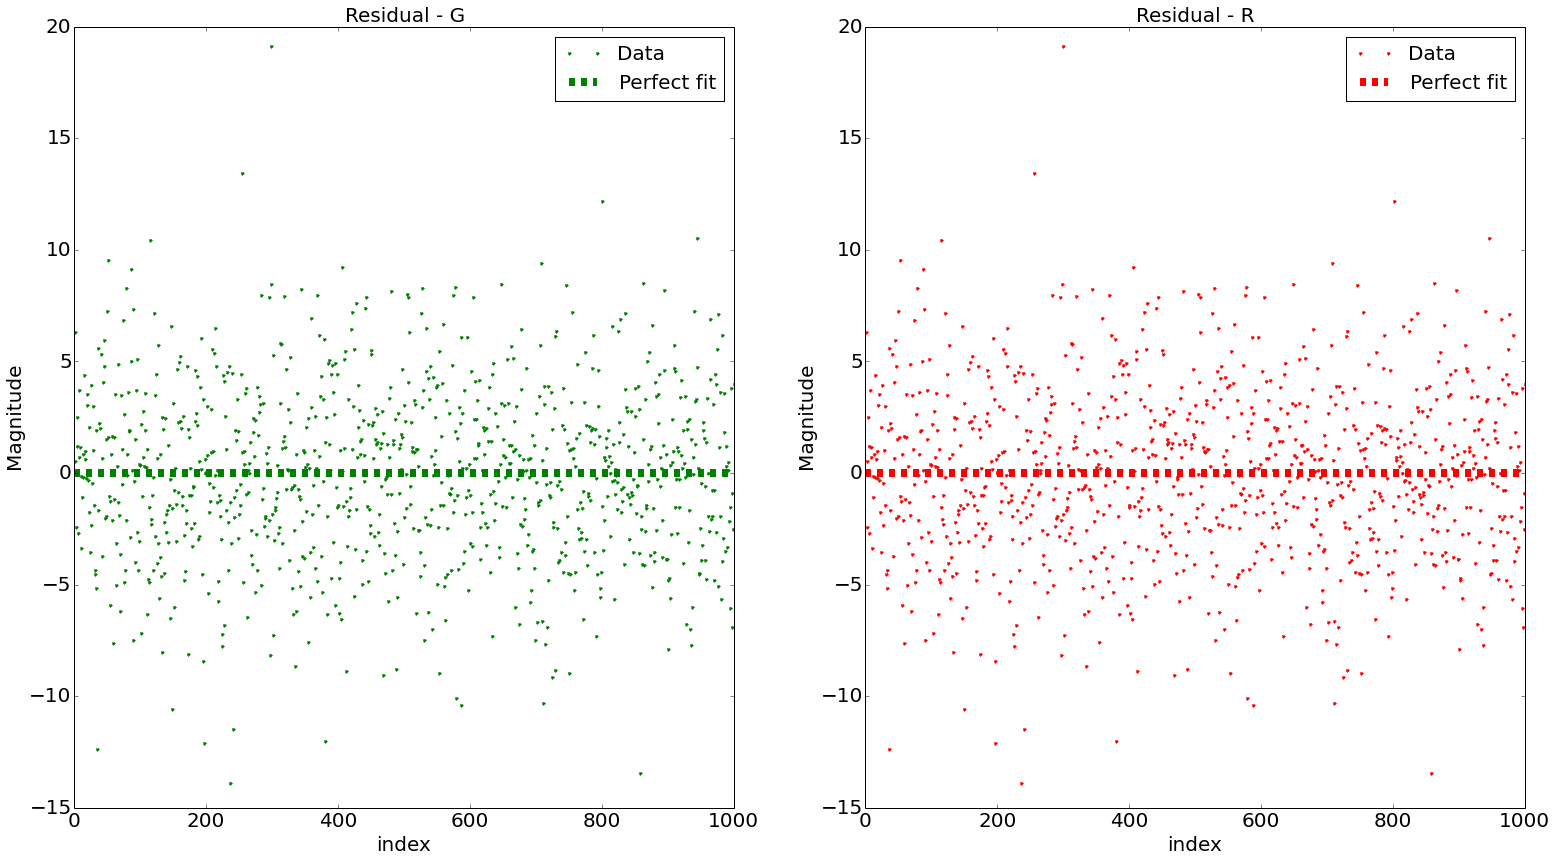

In [38]:
plt.figure(figsize=(26,14))
plt.subplot(121); plt.plot(idnum,vmagtrue-calmag_g,'g.',label='Data')
plt.title('Residual - G'); plt.plot([0,1000],[0,0],'g--',lw=8,label='Perfect fit')
plt.legend(); plt.xlabel('index'); plt.ylabel('Magnitude')
plt.subplot(122); plt.plot(idnum,rmagtrue-calmag_r,'r.',label='Data')
plt.title('Residual - R'); plt.plot([0,1000],[0,0],'r--',lw=8,label='Perfect fit')
plt.legend(); plt.xlabel('index'); plt.ylabel('Magnitude')

Very bad. 5 magnitude off means 100 times flux "shift". First of all, all the equations we use are the simplest ones. But... What's wrong with those outliers?

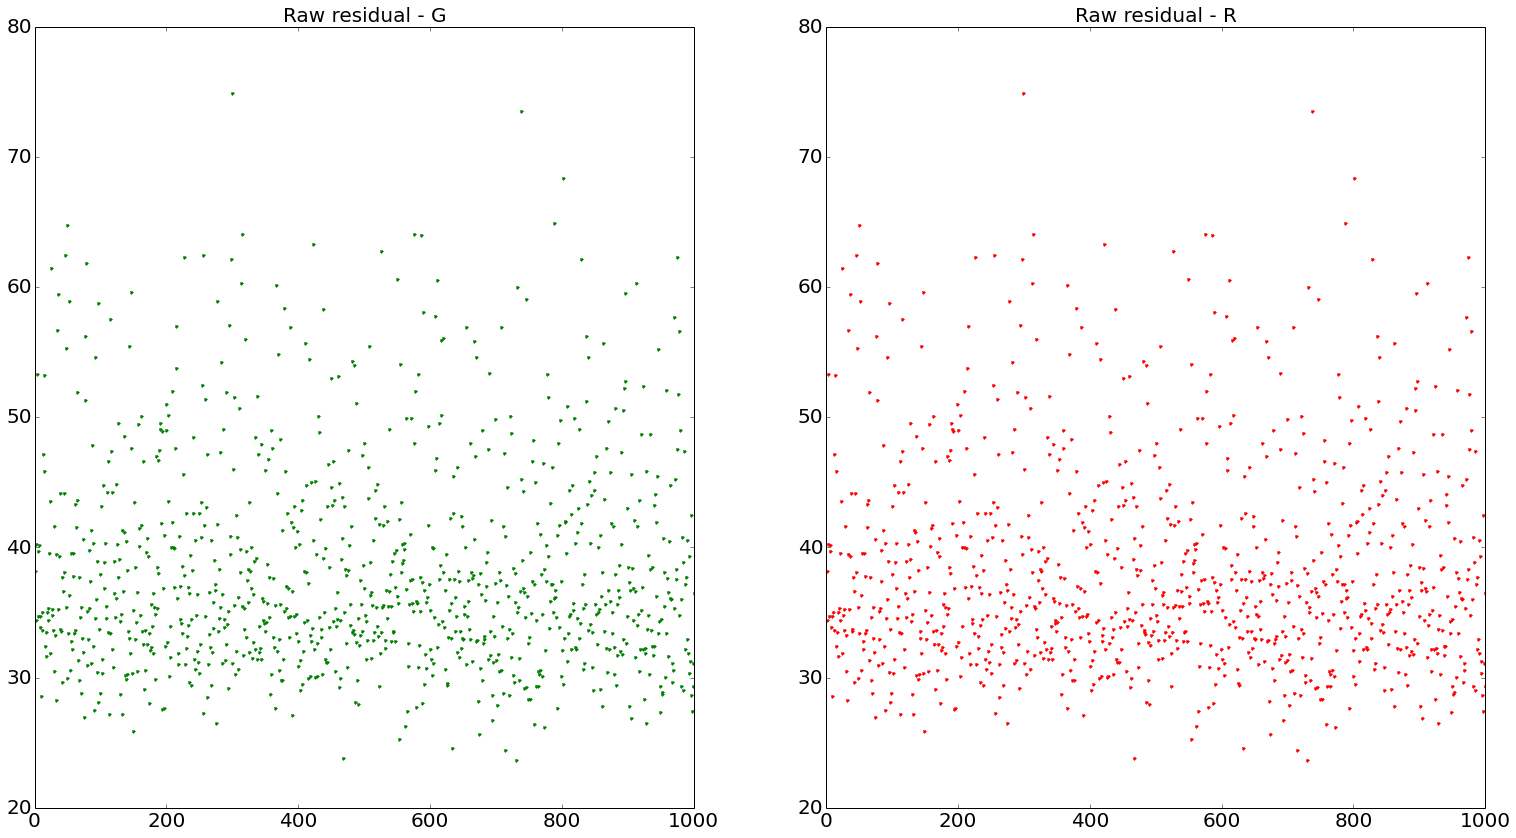

In [48]:
plt.figure(figsize=(26,14))
plt.subplot(121); plt.plot(idnum,vmagtrue-gmag,'g.'); plt.title('Raw residual - G')
plt.subplot(122); plt.plot(idnum,rmagtrue-rmag,'r.'); plt.title('Raw residual - R')

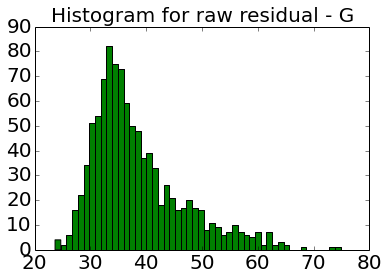

In [53]:
plt.hist(vmagtrue-gmag,bins=50,color='g')
plt.title('Histogram for raw residual - G')

Seems... reasonable?! Most are concentrated around 35, so at least we can expect to get "most" sources right...

### Part II
I'm going to try SIX stars

In [96]:
np.random.seed(1240)

## only do "G (V)" here
idx_1 = np.random.randint(low=0,high=len(cat)-1); print 'index: {0}'.format(idx_1)

refzp1 = (vmagtrue-gmag)[idx_1]
diffcalmag1 = gmag + refzp1

## for a different star
idx_2 = np.random.randint(low=0,high=len(cat)-1); print 'index: {0}'.format(idx_2)

refzp2 = (vmagtrue-gmag)[idx_2]
diffcalmag2 = gmag + refzp2

## for a different star
idx_3 = np.random.randint(low=0,high=len(cat)-1); print 'index: {0}'.format(idx_3)

refzp3 = (vmagtrue-gmag)[idx_3]
diffcalmag3 = gmag + refzp3

## for a different star
idx_4 = np.random.randint(low=0,high=len(cat)-1); print 'index: {0}'.format(idx_4)

refzp4 = (vmagtrue-gmag)[idx_4]
diffcalmag4 = gmag + refzp4

## for a different star
idx_5 = np.random.randint(low=0,high=len(cat)-1); print 'index: {0}'.format(idx_5)

refzp5 = (vmagtrue-gmag)[idx_5]
diffcalmag5 = gmag + refzp5

## for a different star
idx_6 = np.random.randint(low=0,high=len(cat)-1); print 'index: {0}'.format(idx_6)

refzp6 = (vmagtrue-gmag)[idx_6]
diffcalmag6 = gmag + refzp6

index: 687
index: 928
index: 765
index: 13
index: 823
index: 365


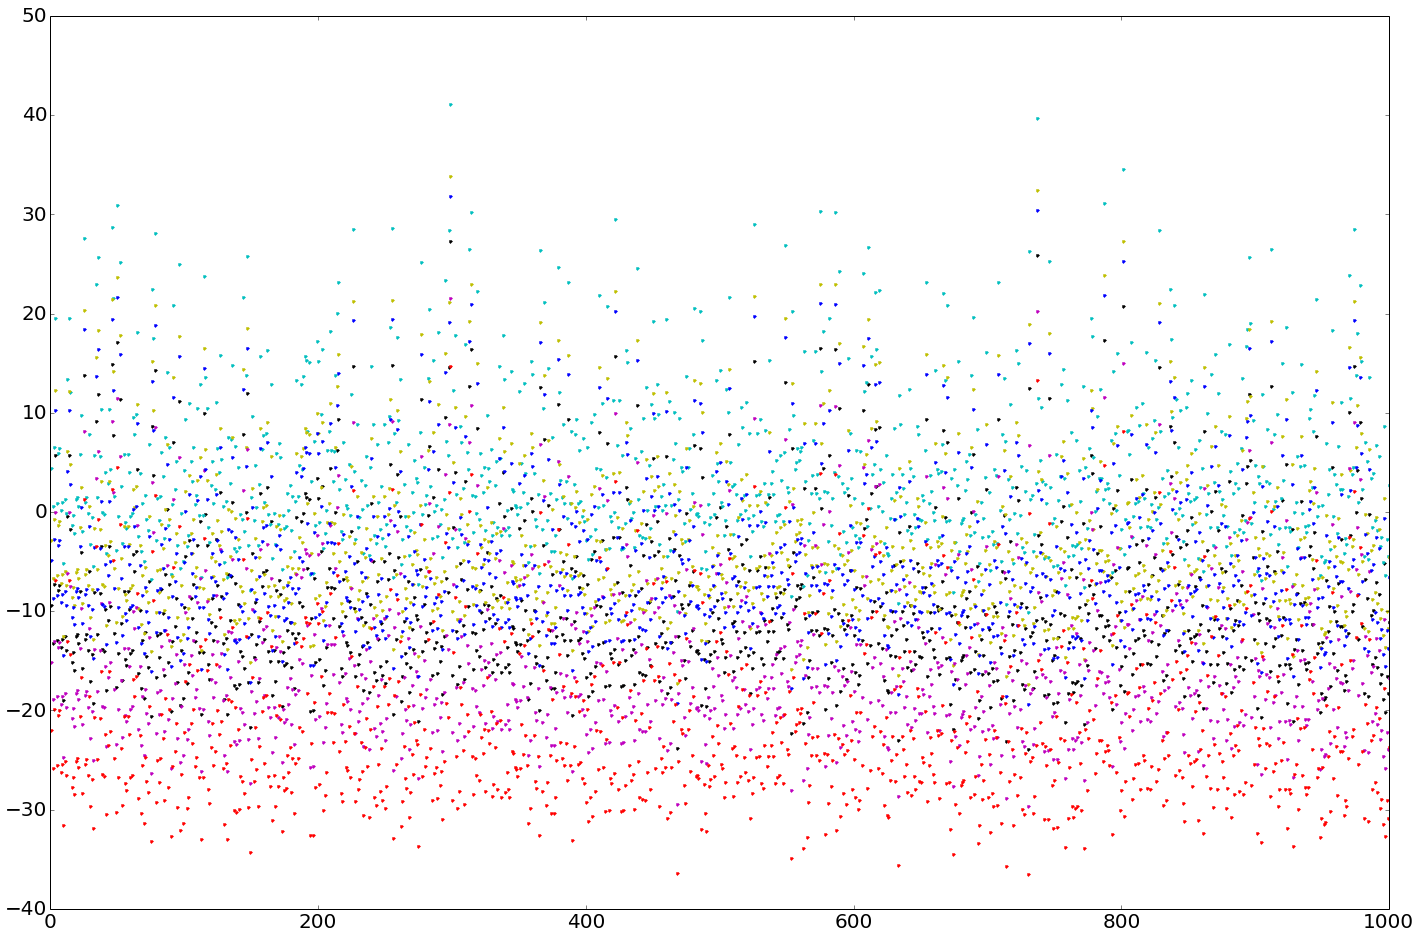

In [100]:
plt.figure(figsize=(24,16))
plt.plot(idnum,vmagtrue-diffcalmag1,'k.',label='#1')
plt.plot(idnum,vmagtrue-diffcalmag2,'c.',label='#2')
plt.plot(idnum,vmagtrue-diffcalmag3,'y.',label='#3')
plt.plot(idnum,vmagtrue-diffcalmag4,'m.',label='#4')
plt.plot(idnum,vmagtrue-diffcalmag5,'b.',label='#5')
plt.plot(idnum,vmagtrue-diffcalmag6,'r.',label='#6')

Some observations:
* The outliers are still outliers. I guess the observations for them were simply bad
* Overall the result(s) look(s) quite similar to the results obtained from the more complicated "absolute photometry" above, implying that the two are equally "good" (actually "bad") in our case. (But in fact we still gained something in the fitting, see the distributions below)
* Different "reference" stars absolutely give distinct "shifts" (at least in my case). 
* Since each star may have different colors, the linear subtraction (Equation (5) in the handout) does not work. Not all the terms (except for zero point) are identical for all stars.

### Supporting plots:
"Distributions" of the residuals

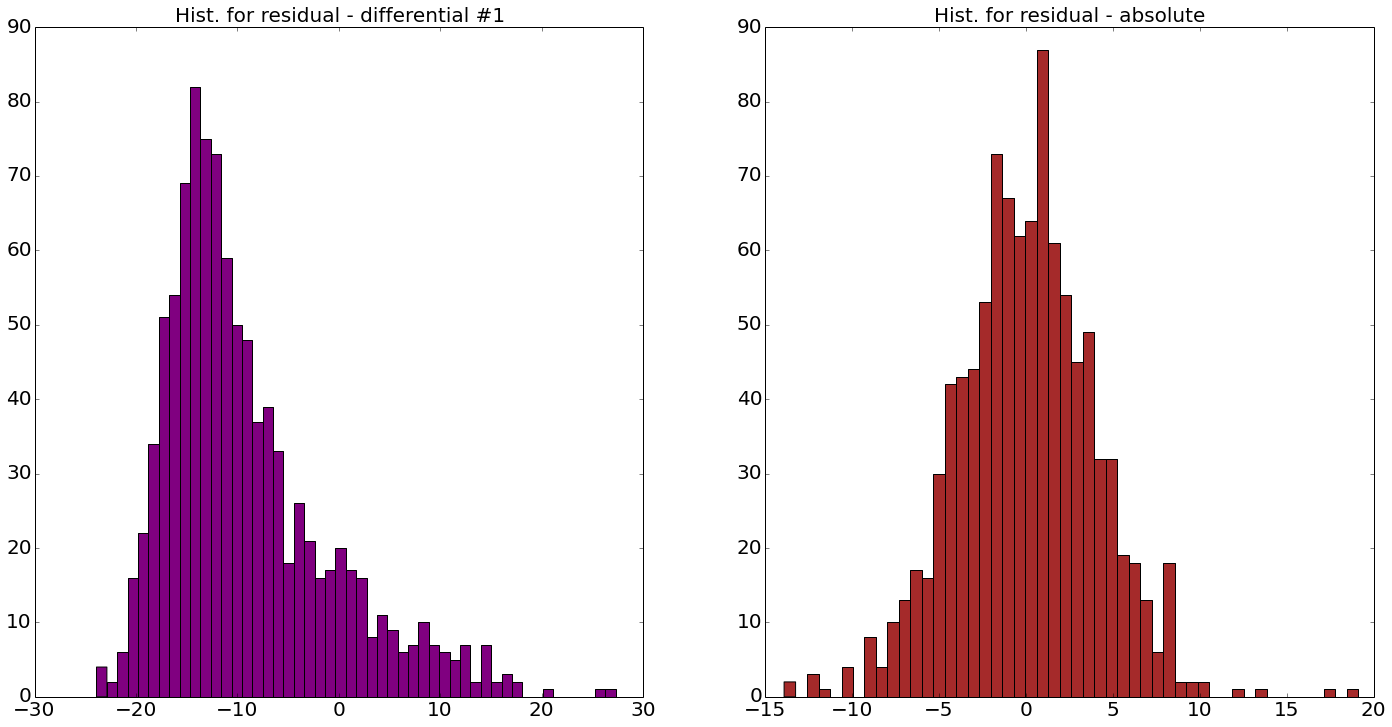

In [101]:
plt.figure(figsize=(24,12))
plt.subplot(121)
plt.hist(vmagtrue-diffcalmag1,bins=50,color='purple')
plt.title('Hist. for residual - differential #1')
plt.subplot(122)
plt.hist(vmagtrue-calmag_g,bins=50,color='brown')
plt.title('Hist. for residual - absolute')

For example, in the differential case, all samples are clearly biased (not centered on 0)